## Overview

In this section, we will take the [Gridded Monthly Temperature Anomaly Data](https://data.giss.nasa.gov/gistemp/) from 1880-present from GISTEMP and visualize the temperature anomaly for any year.

## Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
  !pip install cartopy netCDF4

In [ ]:
import cartopy
import cartopy.crs as ccrs
import os
import matplotlib.pyplot as plt
import xarray as xr

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

filename = 'gistemp1200_GHCNv4_ERSSTv5.nc'

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/gistemp/'

download(data_url + filename)

## Data Pre-Processing

We read the data using `XArray` and select the `tempanomaly` variable.

In [ ]:
file_path = os.path.join(data_folder, filename)
ds = xr.open_dataset(file_path)
da = ds.tempanomaly
da

We have monthly anomalies from 1880-present. Let's aggregate it to mean yealy anomalies.

In [ ]:
yearly = da.groupby('time.year').mean(dim='time')
yearly

## Plotting using Matplotlib


Let's extract the data for one of the years.

In [ ]:
year = 2023

We can use the `.sel()` method to query using the value of the `year` dimension.

In [ ]:
anomaly = yearly.sel(year=year)
anomaly

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
anomaly.plot.imshow(ax=ax)
plt.show()

We can customize the plot using Matplotlib's options.

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)

anomaly.plot.imshow(ax=ax,
    vmin=-3, vmax=3, add_labels=False, cmap='coolwarm')

ax.set_title(f'Temperature Anomaly in {year} (°C)', fontsize = 14)

plt.show()

## Plotting using CartoPy

To create more informative map visualization, we need to reproject this grid to another projection. CartoPy supports a wide range of projections and can plot them using matplotlib. CartoPy creates a GeoAxes object and replaces the default Axes with it. This allows you to plot the data on a specified projection.

We start as usual by create a subplot but specify an additional argument to set the CRS from CartoPy.

Reference: [CartoPy List of Projections](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html?highlight=list#list-of-projections)

In [ ]:
projection = ccrs.Orthographic(0, 30)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
fig.set_size_inches(5,5)

anomaly.plot.imshow(ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()

We can further customize the map by adjusting the colorbar.

Reference: [matplotlib.pyplot.colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)

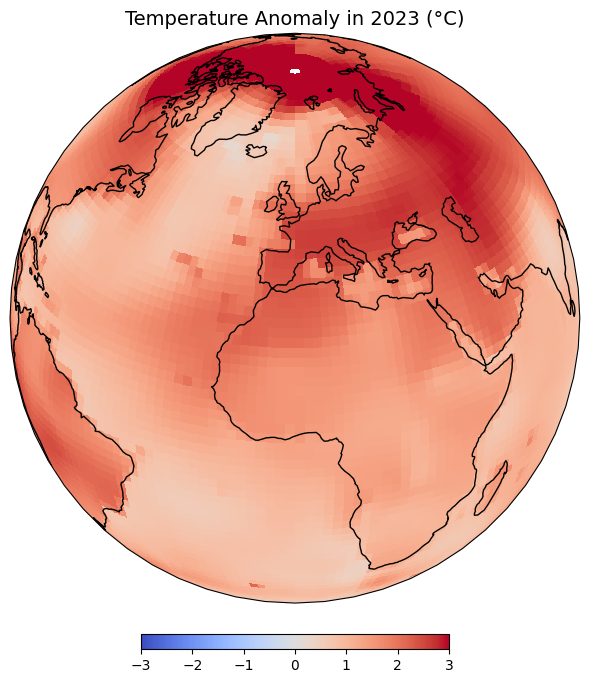

In [ ]:
projection = ccrs.Orthographic(0, 30)

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
fig.set_size_inches(8, 8)
anomaly.plot.imshow(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs)

ax.coastlines()
plt.title(f'Temperature Anomaly in {year} (°C)', fontsize = 14)

output_folder = 'output'
output_path = os.path.join(output_folder, 'anomaly.jpg')
plt.savefig(output_path, dpi=300)
plt.show()

## Exercise

Display the map in the Equal Earth projection.

<img src='https://courses.spatialthoughts.com/images/python_dataviz/anomaly.png' width=400/>